In [62]:
%load_ext autoreload
%autoreload 

import sys
sys.path.insert(0, "..")

import logging
from dotenv import load_dotenv
load_dotenv("/path/to/connectors.env")

from test_collection.get_gen_pop import *
from test_collection.get_data import *
from test_collection.get_splits import *
from test_collection.get_estimations import *
from test_collection.utils_check_config import read_test_params, check_test_config

from test_collection.get_results import *
from econometrics.supporting_func import *
from test_collection.utils_dir import *
from test_collection.get_estimations import *
from econometrics.supporting_func import *
from data.get_partners import *
from test_collection.get_partner_data import load_partner_data
from test_collection.get_partner_splits import *
from test_collection.get_results import evaluate_partner_test_cuped

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler()
    ]
)

#### Загрузка конфига

In [32]:
config_path = "/home/previna/master_partners/test_params/test_params_partners.py"
test_params = read_test_params(path=config_path)

#### Создание директории

In [33]:
create_directory(test_params)

#### Загрузка файла генеральной совокупности и проверка его заполнения

In [34]:
gen_pop = get_all_partners()

#### Получение данных для CUPED оценки 

In [42]:
obs_data = load_partner_data(test_params=test_params,
                            gen_pop=gen_pop,
                            obs=True)

2023-05-01 13:25:17,339 [INFO] Collecting data from 2023-04-03 to 2023-04-16
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.42s/it]
2023-05-01 13:25:39,006 [INFO] Initial data collected
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.64it/s]
2023-05-01 13:25:41,694 [INFO] Partner id converted to uuid
2023-05-01 13:25:41,696 [INFO] Data filtering for units in general population started
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.76it/s]
2023-05-01 13:25:42,540 [INFO] Data filtered for units in general population
2023-05-01 13:25:42,541 [INFO] Merging metrics
100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.73it/s]
2023-05-01 13:25:43,276 [INFO] Merged metrics


In [43]:
exp_data = load_partner_data(test_params=test_params,
                            gen_pop=gen_pop,
                            exp=True)

2023-05-01 13:32:37,215 [INFO] Collecting data from 2023-04-17 to 2023-04-30
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:16<00:00,  4.11s/it]
2023-05-01 13:32:53,664 [INFO] Initial data collected
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.78it/s]
2023-05-01 13:32:55,633 [INFO] Partner id converted to uuid
2023-05-01 13:32:55,634 [INFO] Data filtering for units in general population started
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.56it/s]
2023-05-01 13:32:55,895 [INFO] Data filtered for units in general population
2023-05-01 13:32:55,895 [INFO] Merging metrics
100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.22it/s]
2023-05-01 13:32:56,115 [INFO] Merged metrics


#### Получение сплитов и их фильтрация

In [47]:
strat_splits = get_partner_splits(test_params=test_params,
                                  obs_data=obs_data, 
                                  gen_pop=gen_pop,
                                  save=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.88s/it]
2023-05-01 13:33:42,221 [INFO] Additional metrics collected
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 19.00it/s]
2023-05-01 13:33:44,142 [INFO] Data aggregation done
2023-05-01 13:33:44,153 [INFO] Bucketization done
2023-05-01 13:33:44,164 [INFO] Clusterization done, 979 clusters created
100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [39:27<00:00,  2.37s/it]
2023-05-01 14:13:11,656 [INFO] Stratified splits created


#### АА тесты

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:02<00:00,  8.17it/s]
/home/previna/master_partners/notebooks/../test_collection/get_estimations.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  save_time = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-05-01 14:18:52,823 [INFO] Simulations' results saved to AB-partner_test/FPR_AB-partner_test.md


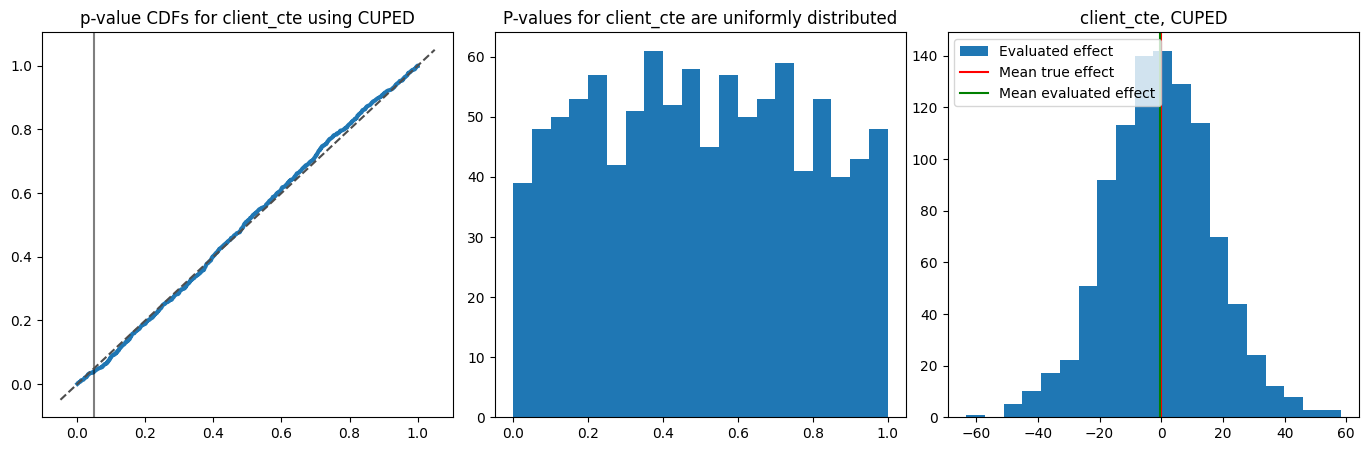

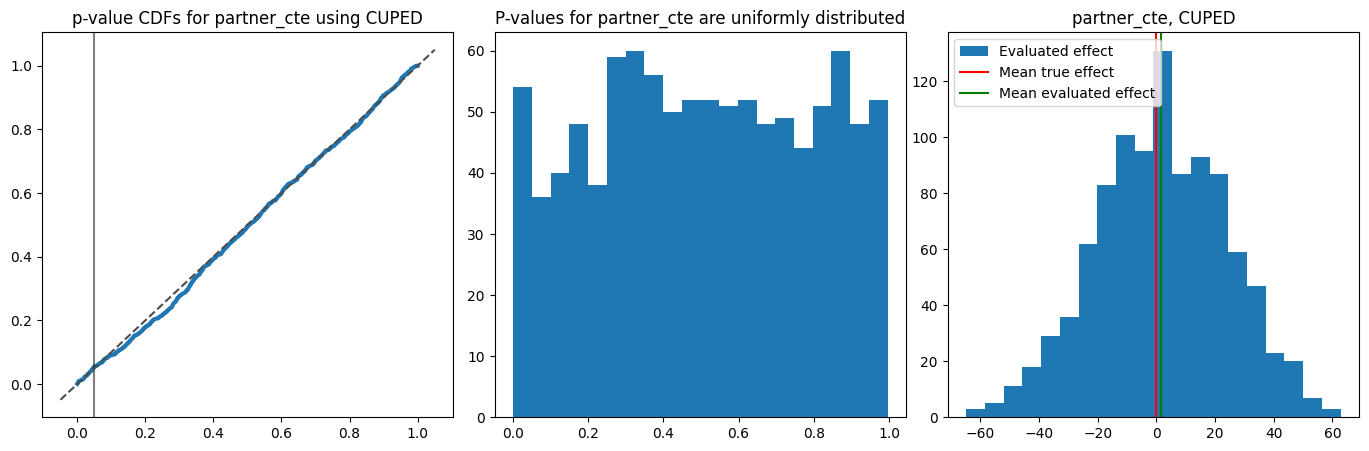

In [48]:
get_cuped_results(obs_metrics_agg=obs_data,
                  exp_metrics_agg=exp_data,
                  strat_splits=strat_splits,
                  test_params=test_params,
                  metrics_definition=partner_metrics_definition,
                  ab_store=False)

#### Генерация синтетического эффекта

In [49]:
effect_distribution = generate_general_effect_distribution(test_params=test_params,
                                                           exp_metrics=exp_data,
                                                           splits=strat_splits,
                                                           metrics_definition=partner_metrics_definition)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.33it/s]
2023-05-01 14:19:07,470 [INFO] Effect distribution saved to AB-partner_test/effect_distribution_AB-partner_test.md


In [50]:
effect_distribution_ratio_plot = generate_effect_distribution_ratio(test_params=test_params,
                                                                    exp_data=exp_data,
                                                                    splits=strat_splits,
                                                                    metrics_definition=partner_metrics_definition)

100%|█████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 210.34it/s]


#### АБ тесты

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.52it/s]
/home/previna/master_partners/notebooks/../test_collection/get_estimations.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  save_time = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-05-01 14:25:17,067 [INFO] Simulations' results saved to AB-partner_test/power_AB-partner_test.md


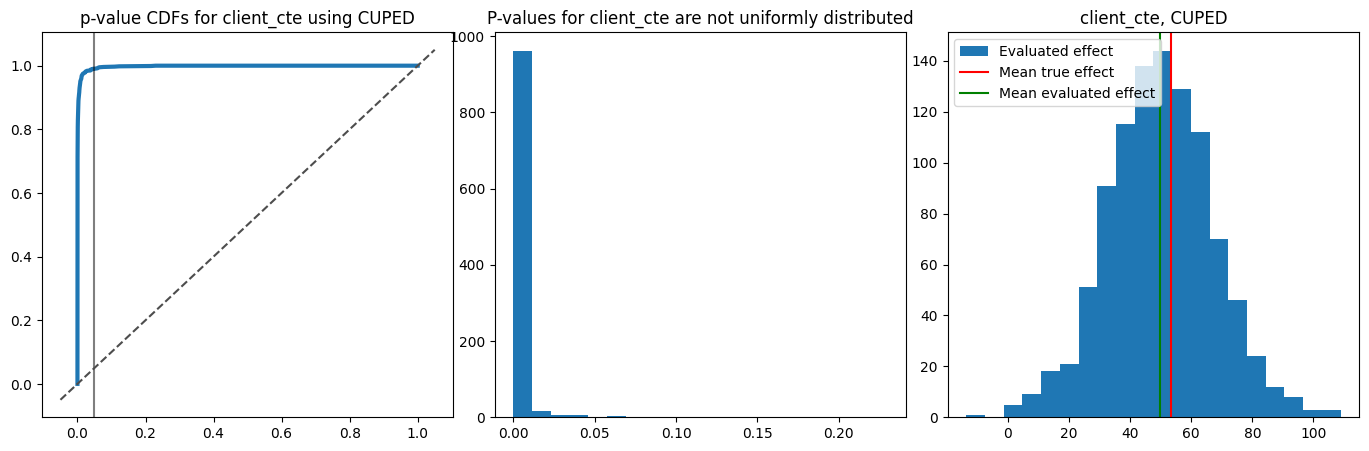

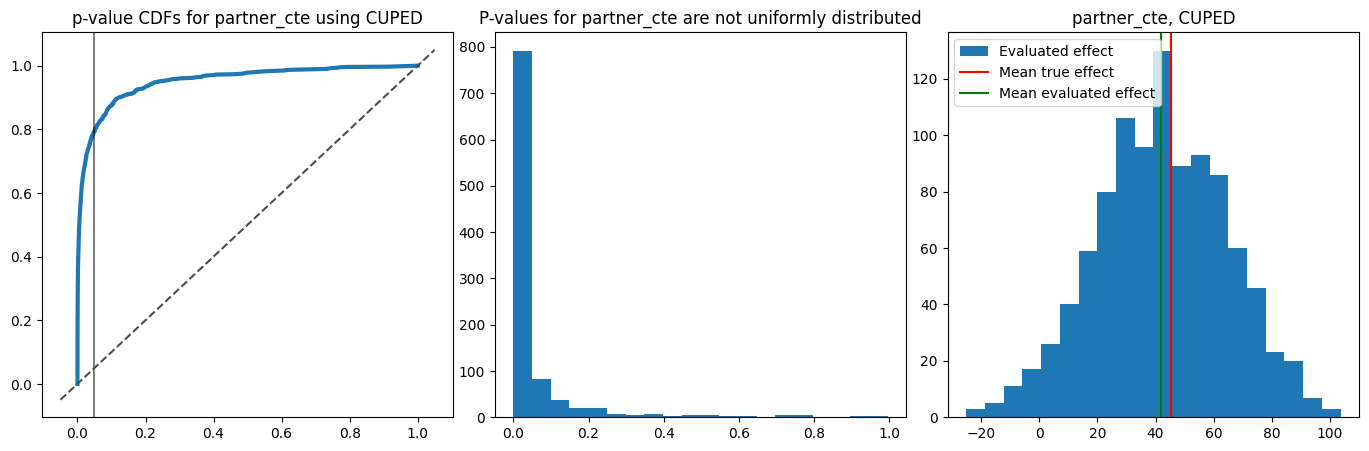

In [51]:
get_cuped_results(obs_metrics_agg=obs_data,
                  exp_metrics_agg=exp_data,
                  strat_splits=strat_splits,
                  test_params=test_params,
                  synth=True,
                  effect_distribution=effect_distribution,
                  effect_distribution_ratio_plot=effect_distribution_ratio_plot,
                  metrics_definition=partner_metrics_definition,
                  ab_store=False)

#### Получение итогового сплита

In [56]:
split = get_partner_split_df(exp_metrics=exp_data,
                             test_params=test_params,
                             gen_pop=gen_pop)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:23<00:00,  5.96s/it]
2023-05-01 16:35:44,605 [INFO] Additional metrics collected
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.18it/s]
2023-05-01 16:35:56,771 [INFO] Data aggregation done
2023-05-01 16:35:56,858 [INFO] Bucketization done
2023-05-01 16:35:56,963 [INFO] Clusterization done, 905 clusters created
100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:15:32<00:00, 11.73s/it]
2023-05-01 19:51:29,565 [INFO] Stratified splits created
2023-05-01 19:51:31,169 [INFO] Split saved to AB-partner_test/split_AB-partner_test.csv


#### Оценка результатов

In [61]:
evaluate_partner_test_cuped(test_params=test_params,
                            ab_store=False,
                            metrics_definition=partner_metrics_definition)

2023-05-02 06:02:08,301 [INFO] Collecting data from 2023-02-02 to 2023-03-08
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:49<00:00, 27.33s/it]
2023-05-02 06:03:57,632 [INFO] Initial data collected
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.37s/it]
2023-05-02 06:04:05,071 [INFO] Partner id converted to uuid
2023-05-02 06:04:05,073 [INFO] Data filtering for units in general population started
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]
2023-05-02 06:04:08,587 [INFO] Data filtered for units in general population
2023-05-02 06:04:08,588 [INFO] Merging metrics
100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]
2023-05-02 06:04:11,102 [INFO] Merged metrics
2023-05-02 06:04:11,917 [INFO] Collecting

'| Метрика     |   P-value |   Абсолютный эффект |   Относительный эффект |\n|:------------|----------:|--------------------:|-----------------------:|\n| client_cte  |     0.628 |             -33.553 |                 -0.894 |\n| partner_cte |     0.265 |             -11.359 |                 -0.537 |'